In [1]:
import random

(1) Write a Python function RandomGraph(n,p) that generates a random graph with n vertices, where each edge occurs independently with probability p. You should represent your graph as an adjacency list.

In [24]:
def RandomGraph(n, p):
    
    graph = {i: [] for i in range(n)} 
    
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                graph[i].append(j)
                graph[j].append(i)
                
    return graph

In [ ]:
# Testing RandomGraph(n, p):

n = 5 # 5 vertices
p = 0.4 # 40% chance of an edge between any two vertices

print(RandomGraph(n, p))

In the above code, I used two nested for loops to generate the edges of an undirected random graph. The outer loop iterates over each vertex i from 0 to n-1. Since the graph is undirected, an edge (i, j) is considered identical to (j, i). For each vertex i , I restricted the inner loop to only iterate over each vertex j where j > i to avoid processing the same edge twice.

(2) Write a Python function ConnectedComponents(graph) that returns the connected components of the graph as a list. The input is the adjacency list of the graph, and the output should be a list of adjacency lists. Explain in detail how your function worked using as input the adjacency list [[1, 2, 3], [0, 2], [0, 1], [0], [4], [5]]

In [71]:
def ConnectedComponents(graph):
    visited = [False] * len(graph)  # Fixed initialization
    components = []

    for vertex in range(len(graph)):
        if not visited[vertex]:
            component = []
            stack = [vertex]

            while stack:
                current = stack.pop()
                if not visited[current]:
                    visited[current] = True 
                    component.append(current)
                    
                    for neighbor in graph[current]:
                        if not visited[neighbor]:
                            stack.append(neighbor)

            components.append(component)

    component_subgraphs = []
    for component in components:
        subgraph = {}
        for vertex in component:
            subgraph[vertex] = [v for v in graph[vertex] if v in component]
        component_subgraphs.append(subgraph)

    return component_subgraphs

In [ ]:
# Testing ConnectedComponents(graph):

graph = [
    [1, 2, 3],  # 0 connects to 1,2,3
    [0, 2],     # 1 connects to 0,2
    [0, 1],     # 2 connects to 0,1
    [0],        # 3 connects to 0
    [4],        # 4 connects to itself
    [5]         # 5 connects to itself
]

print("Found these groups:")
for group in ConnectedComponents(graph):
    print(group)

I used three nested loops to list connected vertices in a graph. The outer for loop checks each unvisited vertex, the middle while loop performs a depth-first research (DFS) using a stack to explore all reachable nodes. The inner for loop explores all neighbors of the current vertex, pushing unvisited ones onto the stack. This structure ensures each vertex is visited exactly once, and each connected subgraph is isolated from standalone nodes. For example, given[[1, 2, 3], [0, 2], [0, 1], [0], [4], [5]], it outputs three components: {0, 1, 2, 3}, {4}, and {5}.

(3) Write a Python function AverageLargestComponentSize(n, p, numsim) that generates numsim many random graphs, determines the largest connected component of each, and returns the average of the sizes of these connected components. Here, "size" means the number of vertices.

In [73]:
def AverageLargestComponentSize(n, p, numsim):

    total = 0

    for _ in range(numsim):

        graph = {i: [] for i in range(n)}
        for i in range(n):
            for j in range(i + 1, n):
                if random.random() < p:
                    graph[i].append(j)
                    graph[j].append(i)

        visited = [False] * n
        max_size = 0

        for vertex in range(n):
            if not visited[vertex]:
                stack = [vertex]
                current_size = 0

                while stack:
                    node = stack.pop()
                    if not visited[node]:
                        visited[node] = True
                        current_size += 1
                        for neighbor in graph[node]:
                            if not visited[neighbor]:
                                stack.append(neighbor)

                if current_size > max_size:
                    max_size = current_size
                    
        total += max_size
        
    return total / numsim

In [ ]:
# Testing AverageLargestComponentSize(n, p, numsim):

avg = AverageLargestComponentSize(100, 0.02, 50)
print(f"Average Largest component size: {avg:.2f}")

Average Largest component size: 77.82


The above code uses the RandomGraph(n, p) function for part(1) to generate random graphs, and finds the largest connected group using part(2)'s DFS logic. After testing "numsim" graphs, it calculates the average size of these largest groups. For example, for n=100, p=0.02, and numsim=50, it generates 50 graphs, measures their largest components, and returns their average (e.g., ~77.82).

(4) You will now investigate the emergence of a giant component of a random graph when p is near 1/n. (When p = 1/n and n is large, the expected value of the degree of any vertex in the graph is close to 1.) Do the following for n = 20, 50, 100, 200, 500, 1000, and for p = t/n where t ranges from 0 to 4 in increments of 0.1. For each of these n, p, generate 50 random graphs, compute the size of the largest connected component, and take the average over the 50 graphs (using your functions from parts (1)-(3)). Create a single plot of the results, with a curve for each value of n. The horizontal axis should be pn, and the vertical axis should be 1/n times the size of the largest component.

n=20, t=0.0, p=0.000000, normalized size=0.0500
n=20, t=0.1, p=0.005000, normalized size=0.0840
n=20, t=0.2, p=0.010000, normalized size=0.1070
n=20, t=0.3, p=0.015000, normalized size=0.1310
n=20, t=0.4, p=0.020000, normalized size=0.1490
n=20, t=0.5, p=0.025000, normalized size=0.1720
n=20, t=0.6, p=0.030000, normalized size=0.2170
n=20, t=0.7, p=0.035000, normalized size=0.2130
n=20, t=0.8, p=0.040000, normalized size=0.2750
n=20, t=0.9, p=0.045000, normalized size=0.2790
n=20, t=1.0, p=0.050000, normalized size=0.3650
n=20, t=1.1, p=0.055000, normalized size=0.3280
n=20, t=1.2, p=0.060000, normalized size=0.4000
n=20, t=1.3, p=0.065000, normalized size=0.4830
n=20, t=1.4, p=0.070000, normalized size=0.5660
n=20, t=1.5, p=0.075000, normalized size=0.6030
n=20, t=1.6, p=0.080000, normalized size=0.5460
n=20, t=1.7, p=0.085000, normalized size=0.5890
n=20, t=1.8, p=0.090000, normalized size=0.6890
n=20, t=1.9, p=0.095000, normalized size=0.7520
n=20, t=2.0, p=0.100000, normalized size

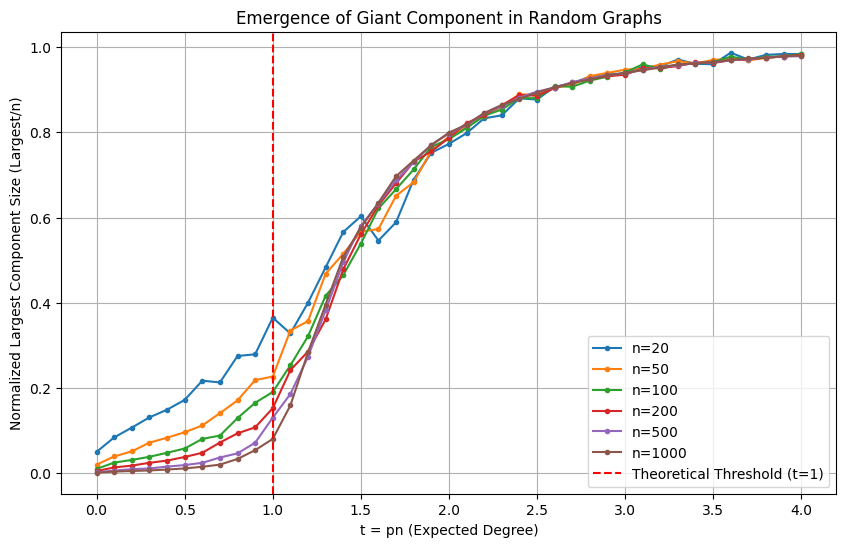

In [78]:
import matplotlib.pyplot as plt
import numpy as np

n_values = [20, 50, 100, 200, 500, 1000]
t_values = np.arange(0, 4.1, 0.1)

num_simulations = 50

# Store results: {n: {t: average_normalized_size}}
results = {n: {} for n in n_values}

for n in n_values:
    for t in t_values:
        p = t / n
        avg_size = AverageLargestComponentSize(n, p, num_simulations)
        normalized_size = avg_size / n  # Vertical axis: (size of largest component)/n
        results[n][t] = normalized_size
        print(f"n={n}, t={t:.1f}, p={p:.6f}, normalized size={normalized_size:.4f}")

plt.figure(figsize=(10, 6))
for n in n_values:
    ts = list(results[n].keys())
    sizes = list(results[n].values())
    plt.plot(ts, sizes, marker='o', markersize=3, label=f'n={n}')

plt.xlabel('t = pn (Expected Degree)')
plt.ylabel('Normalized Largest Component Size (Largest/n)')
plt.title('Emergence of Giant Component in Random Graphs')
plt.axvline(x=1, color='red', linestyle='--', label='Theoretical Threshold (t=1)')
plt.grid(True)
plt.legend()
plt.show()

The above code tests when random graphs become well connected. It makes many random graphs of size "n" (in this example, varying from 20 to 1000), with different connection levels. For each size, it checks how big the largest connected group gets as connections increase. The results suggest that when average connections pass 1 per node, a giant group suddenly forms. 
